# Step 1: Importing Libraries and Setting Up

In [1]:
from hexalattice.hexalattice import create_hex_grid          # Used for creating hexagonal grids.
import math                                                  
import numpy as np                                    # Standard libraries for mathematical operations and array handling.
import gurobipy as gp                                        # Library for optimization problems using Gurobi.
from gurobipy import GRB
from PIL import Image                                  # For handling images.
from matplotlib.offsetbox import OffsetImage, AnnotationBbox   # For plotting images in specific positions.

# Step 2: Creating the Hexagonal Grid
In this step, we will create a hexagonal grid with specified parameters.

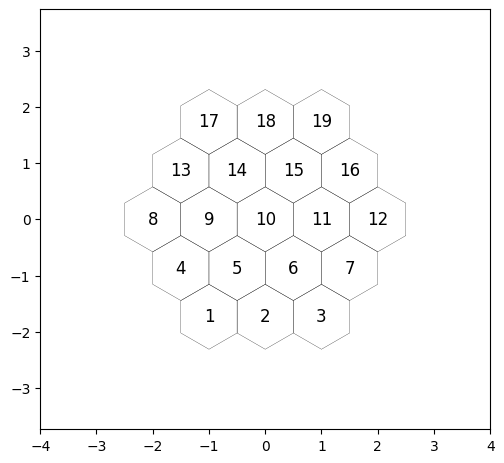

In [2]:
import matplotlib.pyplot as plt
from hexalattice.hexalattice import create_hex_grid

# Create a hexagonal grid with specified parameters
hex_grid, h_ax = create_hex_grid(nx=6, ny=6, rotate_deg=0, min_diam=1, crop_circ=2, do_plot=True)

# Get the coordinates of the hexagon centers
hex_centers = hex_grid[:, :2]

# Number the hex cells
for i, (x, y) in enumerate(hex_centers):
    h_ax.text(x, y, str(i+1), ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.show()

# Creates a 6x6 hexagonal grid with each tile having a diameter of 1 unit and cropped to a circular shape.


# Step 3: Initializing the Neighbor Edge Array
In this step, we will initialize an array to store the edges of neighboring tiles.

The purpose of this array is to store information about the edges of neighboring hexagons. 
Initially, it is filled with zeros. Later, this array will be updated to indicate which edges 
of a hexagon have neighboring hexagons and what the edge numbers are.

In [3]:
# Number of places (hexagons) in the grid
num_places = hex_grid.shape[0]

# Initialize a 2D array to store the edges of neighboring tiles
neighbor_edge = np.zeros((num_places, num_places))
print(neighbor_edge)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Step 4: Updating the Neighbor Edge Array
In this step, we will update the neighbor_edge array to reflect the actual neighboring relationships between the hexagons.

In [4]:
for i in range(num_places):                   # Nested Loops: Iterate over all pairs of hexagons (places).
    for j in range(num_places):
        # Check if the distance between hexagon i and hexagon j is 1 (they are neighbors)
        if round(math.dist((hex_grid[i, 0], hex_grid[i, 1]), (hex_grid[j, 0], hex_grid[j, 1]))) == 1:
            # Calculate the angle between hexagon i and hexagon j
            angle = math.atan2((hex_grid[j, 1] - hex_grid[i, 1]), (hex_grid[j, 0] - hex_grid[i, 0]))
            angle = round(angle * (180.0 / math.pi), 0)  # Convert to degrees and round

            # Determine which edge of hexagon i connects to hexagon j based on the angle.
            if angle == 0.0:
                edge = 1
            elif angle == 60.0:
                edge = 2
            elif angle == 120.0:
                edge = 3
            elif angle == 180.0:
                edge = 4
            elif angle == -120.0:
                edge = 5
            else:  # angle == -60.0
                edge = 6

            neighbor_edge[i, j] = edge  # Update the neighbor_edge array with the determined edge number
            # Print debug information if necessary
            # print(f"Hexagon {i} and Hexagon {j} are neighbors on edge {edge}")

print(neighbor_edge)


[[0. 1. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 1. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [6. 0. 0. 0. 1. 0. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 6. 0. 4. 0. 1. 0. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 6. 0. 4. 0. 1. 0. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 4. 0. 0. 0. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 6. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 6. 0. 0. 4. 0. 1. 0. 0. 3. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 6. 0. 0. 4. 0. 1. 0. 0. 3. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 6. 0. 0. 4. 0. 1. 0. 0. 3. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 4. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5. 6. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 6. 0. 0. 4. 0. 1. 0. 3. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 6. 0. 0. 4. 0. 1. 0. 3. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 6. 0. 0. 4. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.

# Step 5: Determining Missing Edges
In this step, we will create a function to determine the edges of a hexagon that do not have neighboring hexagons. This will be useful for ensuring that no lines of the designated color run off the edge of the board.

In [5]:
def find_missing_edges(place):                # takes a place (hexagon) as input.
    all_edges = [1, 2, 3, 4, 5, 6]            # Create a list of all possible edges (1 to 6) of a hexagon.
    missing_edges = []                        # Initialize an empty list to store edges that do not have neighbors.
    for edge in all_edges:                    # Iterate over all possible edges and check if each edge is present in the 
        if edge not in neighbor_edge[place]:  # neighbor_edge array for the given place.
            missing_edges.append(edge)
    return missing_edges


# Step 6: Defining Tiles and Loading Images
In this step, we will define the tiles and load their corresponding images. Each tile will have a specific pattern of colors, and we'll load images for visualization.

In [6]:
# Define the colors
y = 1
b = 2
r = 3

# List of tiles with their edge colors (each tuple represents a tile with 6 edges)
tiles_list = [
    (r,b,r,b,y,y),
    (b,r,r,b,y,y),
    (y,b,b,r,r,y),
    (b,r,y,b,y,r),
    (r,y,y,r,b,b),
    (r,y,r,y,b,b),
    (y,r,y,r,b,b),
    (y,b,r,y,r,b),
    (r,b,y,r,y,b),
    (b,r,b,r,y,y)
]
# List of images corresponding to the tiles, rotated to fit the hexagonal grid
images_list = [
    Image.open("T1.png"),Image.open("T2.png"),Image.open("T3.png"),Image.open("T4.png"),Image.open("T5.png"),
    Image.open("T6.png"),Image.open("T7.png"),Image.open("T8.png"),Image.open("T9.png"),Image.open("T10.png")
]


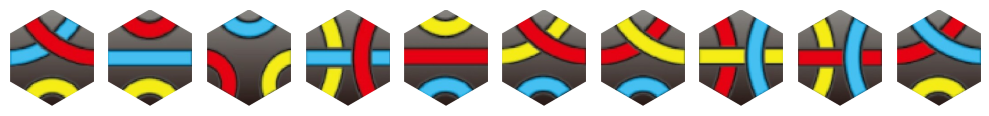

In [7]:
# Display images
fig, axes = plt.subplots(1, 10, figsize=(10, 2.5))

for ax, img in zip(axes.flatten(), images_list):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Step 7: Function to Get Tile Color
In this step, we will create a function that retrieves the color of a tile at a specific edge given its rotation.

In [8]:
def get_tile_color(tile_index, edge, rotation):
    # rotation is clockwise; tile_index is the tile number; edge is the edge number
    color = tiles_list[tile_index - 1][(edge - 1 + rotation - 1) % 6]  # Determine the color of the specified edge 
    return color                                                       # after applying the rotation. The modulo 
                                                                       # operation ensures the index wraps around correctly.

### Example

In [9]:
# Define the tile, edge, and rotation
tile_index = 1   # The first tile in the list
edge = 3         # The third edge of the tile
rotation = 2     # The tile is rotated by 2 positions clockwise

# Get the color of the specified edge after the rotation
color = get_tile_color(tile_index, edge, rotation)

# Print the result
print(f"The color of edge {edge} of tile {tile_index} with rotation {rotation} is: {color}")


The color of edge 3 of tile 1 with rotation 2 is: 2


# Step 8: Setting Up Variables for the Integer Programming Model
In this step, we will set up the variables required for the integer programming model using Gurobi.

In [10]:
# Define the range for tiles, places, and rotations
tiles = range(1, 11)  # 10 tiles
places = range(1, hex_grid.shape[0] + 1)  # Number of places in the grid
rotations = range(1, 7)  # 6 possible rotations for each tile

# Challenge number (number of tiles to place)
challenge_number = 10

# Create the Gurobi model
model = gp.Model("Tantrix")

# Add variables to the model
# x[i,j,k]: Binary variable that is 1 if tile i is placed at place j with rotation k.
x = model.addVars(tiles, places, rotations, vtype=GRB.BINARY, name="x")

# u[j,J]: Binary variable that is 1 if exactly one of the places j and J has a tile.
u = model.addVars(places, places, vtype=GRB.BINARY, name="u")

# y[j,l]: Continuous variable that represents the color of the edge l of place j
y = model.addVars(places, rotations, vtype=GRB.CONTINUOUS, name="y")

# Helper variables to determine if a place is occupied or not
place_occupied = model.addVars(places, vtype=GRB.BINARY, name="occupied")
place_not_occupied = model.addVars(places, vtype=GRB.BINARY, name="not_occupied")

# Helper variables for logical constraints
left = model.addVars(places, places, vtype=GRB.BINARY, name="left")
right = model.addVars(places, places, vtype=GRB.BINARY, name="right")


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


## Step 9: Setting the Objective Function
In this step, we will set a dummy objective function. The primary goal is to find a valid configuration, so the objective function is somewhat arbitrary in this context.

In [11]:
# Set the objective function
model.setObjective(x[1, 1, 1], GRB.MINIMIZE)


## Step 10: Adding Constraints
Next, we will add the constraints to the model. Let's start with the basic constraints that ensure the proper placement of tiles.

### Constraint 1: At most one tile is placed on each place.

In [12]:
# Constraint 1: At most one tile is placed on each place
for place in places:
    model.addConstr(gp.quicksum(x[tile, place, rotation] for tile in tiles for rotation in rotations) <= 1)
    
# Loop through each place: Ensure that each place has at most one tile


### Constraint 2: The number of places each on which a tile is placed equals the challenge number.

In [13]:
# Constraint 2: The number of places each on which a tile is placed equals the challenge number
model.addConstr(gp.quicksum(x[tile, place, rotation] for tile in tiles for place in places for rotation in rotations) == challenge_number)

# Sum of all tile placements: Ensure that the total number of tiles placed equals the challenge number.

<gurobi.Constr *Awaiting Model Update*>

### Constraint 3: Each tile is used the number of times defined by the challenge number.

In [14]:
# Constraint 3: Each tile is used the number of times defined by the challenge number
for tile in tiles:
    model.addConstr(gp.quicksum(x[tile, place, rotation] for place in places for rotation in rotations) == math.ceil((challenge_number + 1 - tile) / 10))
# Loop through each tile: Ensure that each tile is used the correct number of times.

# Step 11: Adding More Constraints
Now, let's add the remaining constraints to ensure that the color of the edges matches and that no lines run off the edge of the board.

### Setting place_occupied and place_not_occupied

In [15]:
# Set place_occupied to 1 if a place has a tile, otherwise 0
for place in places:
    model.addConstr(place_occupied[place] == gp.quicksum(x[tile, place, rotation] for tile in tiles for rotation in rotations))

# Set place_not_occupied to 1 if a place does not have a tile, otherwise 0
for place in places:
    model.addConstr(place_not_occupied[place] == 1 - gp.quicksum(x[tile, place, rotation] for tile in tiles for rotation in rotations))

# Set place_occupied: Ensure that place_occupied is 1 if a place has a tile.
# Set place_not_occupied: Ensure that place_not_occupied is 1 if a place does not have a tile.

### Setting y (color at each edge)

In [16]:
# Set y[j,l] to be the color of the edge l of place j
for place in places:
    for edge in rotations:
        model.addConstr(y[place, edge] == gp.quicksum(get_tile_color(tile, edge, rotation) * x[tile, place, rotation] for tile in tiles for rotation in rotations))
# Set y: Determine the color of each edge for all places.

### Combining Constraints for Neighboring Places

In [17]:
# Combining constraints for neighboring places
for place1 in places:
    for place2 in places:
        if neighbor_edge[place1 - 1][place2 - 1] > 0:
            # Logical constraints
            model.addConstr(left[place1, place2] == gp.and_([place_occupied[place1], place_not_occupied[place2]]))
            model.addConstr(right[place1, place2] == gp.and_([place_not_occupied[place1], place_occupied[place2]]))
            model.addConstr(u[place1, place2] == gp.or_(left[place1, place2], right[place1, place2]))

            edge1 = int(neighbor_edge[place1 - 1][place2 - 1])  # Edge of place1 that connects to place2
            edge2 = int(neighbor_edge[place2 - 1][place1 - 1])  # Edge of place2 that connects to place1

            # Ensure color consistency between neighboring edges
            model.addConstr(-2 * u[place1, place2] <= y[place1, edge1] - y[place2, edge2])
            model.addConstr(y[place1, edge1] - y[place2, edge2] <= 2 * u[place1, place2])
# Check Neighboring Places: For each pair of places, if they are neighbors, 
# set logical constraints and ensure color consistency between neighboring edges.

### Custom Constraint 6: Ensuring No Designated Color Runs Off the Edge

In [18]:
# Custom Constraint 6: Ensuring no designated color (3) runs off the edge
for place in places:
    missing_edges = find_missing_edges(place - 1)
    for edge in missing_edges:
        model.addConstr(y[place, edge] <= 2)
# Ensure No Designated Color Runs Off the Edge: For each place, 
# find missing edges and ensure that the designated color (3) does not run off these edges.

# Step 12: Optimizing the Model and Visualizing the Results
In this final step, we will optimize the model using Gurobi to find a valid solution and then visualize the results by plotting the tiles on the hexagonal grid.

In [19]:
# Optimize the model
model.optimize()

# Check if the model found an optimal solution
if model.status == GRB.OPTIMAL:
    print("Optimal solution found.")
    tile_placements = []  # To store tile placements for visualization

    # Loop through the solution and print tile placements and rotations
    for tile in tiles:
        for place in places:
            for rotation in rotations:
                if round(x[tile, place, rotation].x) == 1:  # Check if the tile is placed at this place with this rotation
                    placement_info = (tile, place, rotation)
                    tile_placements.append(placement_info)
                    print("_______________________________________________________________")
                    print(f"Tile {tile} placed at Place {place} with Rotation {rotation}.")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 380 rows, 2375 columns and 13226 nonzeros
Model fingerprint: 0x1ddc59b5
Model has 252 general constraints
Variable types: 114 continuous, 2261 integer (2261 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve added 111 rows and 0 columns
Presolve removed 0 rows and 1534 columns
Presolve time: 0.06s
Presolved: 491 rows, 841 columns, 5521 nonzeros
Variable types: 0 continuous, 841 integer (757 binary)

Root relaxation: objective 0.000000e+00, 337 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | I

### Visualizing the Results
Once the model is optimized, we need to visualize the tiles on the hexagonal grid based on the solution.

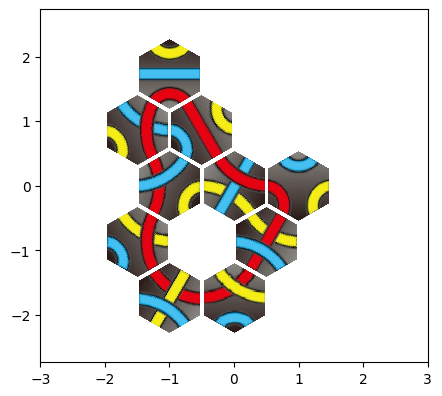

In [20]:
import matplotlib.pyplot as plt

# Check if there are tile placements to visualize
if 'tile_placements' in globals() and len(tile_placements) > 0:
    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect('equal')

    # Plot the solution using OffsetImage and AnnotationBbox from matplotlib
    for tile, place, rotation in tile_placements:
        image = images_list[tile - 1].rotate((rotation - 1) * (-60))  # Rotate the image based on the rotation
        imagebox = OffsetImage(image, zoom=.14)  # Create an OffsetImage with the tile image
        xy = [hex_grid[place - 1, 0], hex_grid[place - 1, 1]]  # Determine the coordinates for placing the tile
        ab = AnnotationBbox(imagebox, xy, frameon=False)  # Create an AnnotationBbox with the image at the coordinates
        ax.add_artist(ab)  # Add the AnnotationBbox to the plot

    # Adjust plot limits
    ax.set_xlim(hex_grid[:, 0].min() - 1, hex_grid[:, 0].max() + 1)
    ax.set_ylim(hex_grid[:, 1].min() - 1, hex_grid[:, 1].max() + 1)

    # Display the plot
    plt.show()
else:
    print("No tile placements to visualize.")


<Figure size 500x500 with 0 Axes>

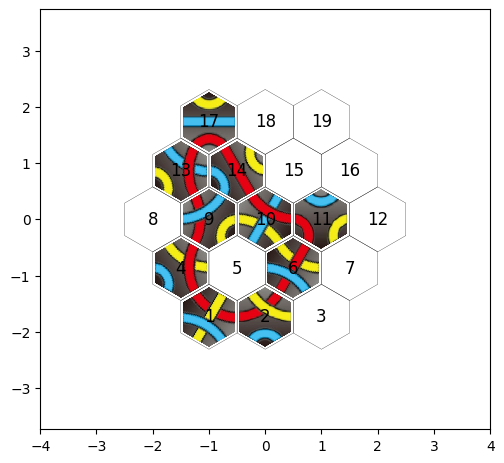

In [21]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from hexalattice.hexalattice import create_hex_grid
from PIL import Image

# Load images
images_list = [
    Image.open("T1.png"),Image.open("T2.png"),Image.open("T3.png"),Image.open("T4.png"),Image.open("T5.png"),
    Image.open("T6.png"),Image.open("T7.png"),Image.open("T8.png"),Image.open("T9.png"),Image.open("T10.png")
]

# Define the positions and rotations
tile_placements = [
    (1, 13, 2),  # Tile 1 placed at Place 13 with Rotation 2
    (2, 17, 4),  # Tile 2 placed at Place 17 with Rotation 4
    (3, 11, 1),  # Tile 3 placed at Place 11 with Rotation 1
    (4, 10, 6),  # Tile 4 placed at Place 10 with Rotation 6
    (5, 14, 2),  # Tile 5 placed at Place 14 with Rotation 2
    (6, 4, 2),   # Tile 6 placed at Place 4 with Rotation 2
    (7, 2, 1),   # Tile 7 placed at Place 2 with Rotation 1
    (8, 1, 3),   # Tile 8 placed at Place 1 with Rotation 3
    (9, 6, 3),   # Tile 9 placed at Place 6 with Rotation 3
    (10, 9, 6)   # Tile 10 placed at Place 9 with Rotation 6
]

# Set figure size
plt.figure(figsize=(5, 5))

# Create a hexagonal grid with specified parameters
hex_grid, ax = create_hex_grid(nx=6, ny=6, rotate_deg=0, min_diam=1, crop_circ=2, do_plot=True)

# Place and rotate each tile
for tile, place, rotation in tile_placements:
    image = images_list[tile - 1].rotate((rotation - 1) * (-60))  # Rotate the image based on the rotation
    imagebox = OffsetImage(image, zoom=0.12)  # Adjust zoom as necessary
    xy = [hex_grid[place - 1, 0], hex_grid[place - 1, 1]]  # Determine the coordinates for placing the tile
    ab = AnnotationBbox(imagebox, xy, frameon=False)  # Create an AnnotationBbox with the image at the coordinates
    ax.add_artist(ab)  # Add the AnnotationBbox to the plot

# Number the hex cells
for i, (x, y) in enumerate(hex_grid):
    ax.text(x, y, str(i+1), ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.show()


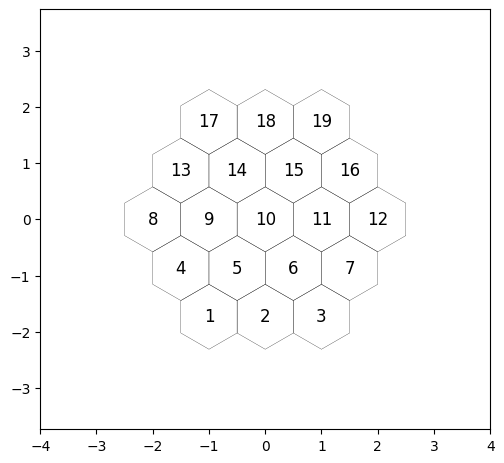

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

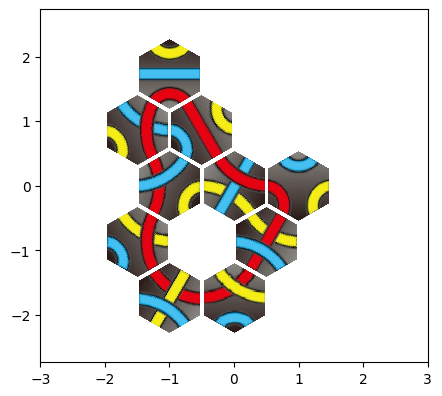

In [1]:
from hexalattice.hexalattice import create_hex_grid          # Used for creating hexagonal grids.
import math                                                  
import numpy as np                                    # Standard libraries for mathematical operations and array handling.
import gurobipy as gp                                        # Library for optimization problems using Gurobi.
from gurobipy import GRB
from PIL import Image                                  # For handling images.
from matplotlib.offsetbox import OffsetImage, AnnotationBbox   # For plotting images in specific positions.

import matplotlib.pyplot as plt
from hexalattice.hexalattice import create_hex_grid

# Create a hexagonal grid with specified parameters
hex_grid, h_ax = create_hex_grid(nx=6, ny=6, rotate_deg=0, min_diam=1, crop_circ=2, do_plot=True)

# Get the coordinates of the hexagon centers
hex_centers = hex_grid[:, :2]

# Number the hex cells
for i, (x, y) in enumerate(hex_centers):
    h_ax.text(x, y, str(i+1), ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.show()

# Creates a 6x6 hexagonal grid with each tile having a diameter of 1 unit and cropped to a circular shape.


# Number of places (hexagons) in the grid
num_places = hex_grid.shape[0]

# Initialize a 2D array to store the edges of neighboring tiles
neighbor_edge = np.zeros((num_places, num_places))
print(neighbor_edge)


for i in range(num_places):                   # Nested Loops: Iterate over all pairs of hexagons (places).
    for j in range(num_places):
        # Check if the distance between hexagon i and hexagon j is 1 (they are neighbors)
        if round(math.dist((hex_grid[i, 0], hex_grid[i, 1]), (hex_grid[j, 0], hex_grid[j, 1]))) == 1:
            # Calculate the angle between hexagon i and hexagon j
            angle = math.atan2((hex_grid[j, 1] - hex_grid[i, 1]), (hex_grid[j, 0] - hex_grid[i, 0]))
            angle = round(angle * (180.0 / math.pi), 0)  # Convert to degrees and round

            # Determine which edge of hexagon i connects to hexagon j based on the angle.
            if angle == 0.0:
                edge = 1
            elif angle == 60.0:
                edge = 2
            elif angle == 120.0:
                edge = 3
            elif angle == 180.0:
                edge = 4
            elif angle == -120.0:
                edge = 5
            else:  # angle == -60.0
                edge = 6

            neighbor_edge[i, j] = edge  # Update the neighbor_edge array with the determined edge number
            # Print debug information if necessary
            # print(f"Hexagon {i} and Hexagon {j} are neighbors on edge {edge}")

print(neighbor_edge)

def find_missing_edges(place):                # takes a place (hexagon) as input.
    all_edges = [1, 2, 3, 4, 5, 6]            # Create a list of all possible edges (1 to 6) of a hexagon.
    missing_edges = []                        # Initialize an empty list to store edges that do not have neighbors.
    for edge in all_edges:                    # Iterate over all possible edges and check if each edge is present in the 
        if edge not in neighbor_edge[place]:  # neighbor_edge array for the given place.
            missing_edges.append(edge)
    return missing_edges


# Define the colors
y = 1
b = 2
r = 3

# List of tiles with their edge colors (each tuple represents a tile with 6 edges)
tiles_list = [
    (r,b,r,b,y,y),
    (b,r,r,b,y,y),
    (y,b,b,r,r,y),
    (b,r,y,b,y,r),
    (r,y,y,r,b,b),
    (r,y,r,y,b,b),
    (y,r,y,r,b,b),
    (y,b,r,y,r,b),
    (r,b,y,r,y,b),
    (b,r,b,r,y,y)
]
# List of images corresponding to the tiles, rotated to fit the hexagonal grid
images_list = [
    Image.open("T1.png"),
    Image.open("T2.png"),
    Image.open("T3.png"),
    Image.open("T4.png"),
    Image.open("T5.png"),
    Image.open("T6.png"),
    Image.open("T7.png"),
    Image.open("T8.png"),
    Image.open("T9.png"),
    Image.open("T10.png")
]


def get_tile_color(tile_index, edge, rotation):
    # rotation is clockwise; tile_index is the tile number; edge is the edge number
    color = tiles_list[tile_index - 1][(edge - 1 + rotation - 1) % 6]  # Determine the color of the specified edge 
    return color                                                       # after applying the rotation. The modulo 
                                                                       # operation ensures the index wraps around correctly.
    
    # Define the tile, edge, and rotation
tile_index = 1   # The first tile in the list
edge = 3         # The third edge of the tile
rotation = 2     # The tile is rotated by 2 positions clockwise

# Get the color of the specified edge after the rotation
color = get_tile_color(tile_index, edge, rotation)

# Print the result
print(f"The color of edge {edge} of tile {tile_index} with rotation {rotation} is: {color}")


# Define the range for tiles, places, and rotations
tiles = range(1, 11)  # 10 tiles
places = range(1, hex_grid.shape[0] + 1)  # Number of places in the grid
rotations = range(1, 7)  # 6 possible rotations for each tile

# Challenge number (number of tiles to place)
challenge_number = 10

# Create the Gurobi model
model = gp.Model("Tantrix")

# Add variables to the model
# x[i,j,k]: Binary variable that is 1 if tile i is placed at place j with rotation k.
x = model.addVars(tiles, places, rotations, vtype=GRB.BINARY, name="x")

# u[j,J]: Binary variable that is 1 if exactly one of the places j and J has a tile.
u = model.addVars(places, places, vtype=GRB.BINARY, name="u")

# y[j,l]: Continuous variable that represents the color of the edge l of place j
y = model.addVars(places, rotations, vtype=GRB.CONTINUOUS, name="y")

# Helper variables to determine if a place is occupied or not
place_occupied = model.addVars(places, vtype=GRB.BINARY, name="occupied")
place_not_occupied = model.addVars(places, vtype=GRB.BINARY, name="not_occupied")

# Helper variables for logical constraints
left = model.addVars(places, places, vtype=GRB.BINARY, name="left")
right = model.addVars(places, places, vtype=GRB.BINARY, name="right")

# Set the objective function
model.setObjective(x[1, 1, 1], GRB.MINIMIZE)


# Constraint 1: At most one tile is placed on each place
for place in places:
    model.addConstr(gp.quicksum(x[tile, place, rotation] for tile in tiles for rotation in rotations) <= 1)
    
# Loop through each place: Ensure that each place has at most one tile

# Constraint 2: The number of places each on which a tile is placed equals the challenge number
model.addConstr(gp.quicksum(x[tile, place, rotation] for tile in tiles for place in places for rotation in rotations) == challenge_number)

# Sum of all tile placements: Ensure that the total number of tiles placed equals the challenge number.

# Constraint 3: Each tile is used the number of times defined by the challenge number
for tile in tiles:
    model.addConstr(gp.quicksum(x[tile, place, rotation] for place in places for rotation in rotations) == math.ceil((challenge_number + 1 - tile) / 10))
# Loop through each tile: Ensure that each tile is used the correct number of times.

# Set place_occupied to 1 if a place has a tile, otherwise 0
for place in places:
    model.addConstr(place_occupied[place] == gp.quicksum(x[tile, place, rotation] for tile in tiles for rotation in rotations))

# Set place_not_occupied to 1 if a place does not have a tile, otherwise 0
for place in places:
    model.addConstr(place_not_occupied[place] == 1 - gp.quicksum(x[tile, place, rotation] for tile in tiles for rotation in rotations))

# Set place_occupied: Ensure that place_occupied is 1 if a place has a tile.
# Set place_not_occupied: Ensure that place_not_occupied is 1 if a place does not have a tile.

# Set y[j,l] to be the color of the edge l of place j
for place in places:
    for edge in rotations:
        model.addConstr(y[place, edge] == gp.quicksum(get_tile_color(tile, edge, rotation) * x[tile, place, rotation] for tile in tiles for rotation in rotations))
# Set y: Determine the color of each edge for all places.
# Combining constraints for neighboring places
for place1 in places:
    for place2 in places:
        if neighbor_edge[place1 - 1][place2 - 1] > 0:
            # Logical constraints
            model.addConstr(left[place1, place2] == gp.and_([place_occupied[place1], place_not_occupied[place2]]))
            model.addConstr(right[place1, place2] == gp.and_([place_not_occupied[place1], place_occupied[place2]]))
            model.addConstr(u[place1, place2] == gp.or_(left[place1, place2], right[place1, place2]))

            edge1 = int(neighbor_edge[place1 - 1][place2 - 1])  # Edge of place1 that connects to place2
            edge2 = int(neighbor_edge[place2 - 1][place1 - 1])  # Edge of place2 that connects to place1

            # Ensure color consistency between neighboring edges
            model.addConstr(-2 * u[place1, place2] <= y[place1, edge1] - y[place2, edge2])
            model.addConstr(y[place1, edge1] - y[place2, edge2] <= 2 * u[place1, place2])
# Check Neighboring Places: For each pair of places, if they are neighbors, 
# set logical constraints and ensure color consistency between neighboring edges.

# Custom Constraint 6: Ensuring no designated color (3) runs off the edge
for place in places:
    missing_edges = find_missing_edges(place - 1)
    for edge in missing_edges:
        model.addConstr(y[place, edge] <= 2)
# Ensure No Designated Color Runs Off the Edge: For each place, 
# find missing edges and ensure that the designated color (3) does not run off these edges.

# Optimize the model
model.optimize()

# Check if the model found an optimal solution
if model.status == GRB.OPTIMAL:
    print("Optimal solution found.")
    tile_placements = []  # To store tile placements for visualization

    # Loop through the solution and print tile placements and rotations
    for tile in tiles:
        for place in places:
            for rotation in rotations:
                if round(x[tile, place, rotation].x) == 1:  # Check if the tile is placed at this place with this rotation
                    placement_info = (tile, place, rotation)
                    tile_placements.append(placement_info)
                    print("_______________________________________________________________")
                    print(f"Tile {tile} placed at Place {place} with Rotation {rotation}.")
else:
    print("No optimal solution found.")

    
    import matplotlib.pyplot as plt

# Check if there are tile placements to visualize
if 'tile_placements' in globals() and len(tile_placements) > 0:
    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect('equal')

    # Plot the solution using OffsetImage and AnnotationBbox from matplotlib
    for tile, place, rotation in tile_placements:
        image = images_list[tile - 1].rotate((rotation - 1) * (-60))  # Rotate the image based on the rotation
        imagebox = OffsetImage(image, zoom=.14)  # Create an OffsetImage with the tile image
        xy = [hex_grid[place - 1, 0], hex_grid[place - 1, 1]]  # Determine the coordinates for placing the tile
        ab = AnnotationBbox(imagebox, xy, frameon=False)  # Create an AnnotationBbox with the image at the coordinates
        ax.add_artist(ab)  # Add the AnnotationBbox to the plot

    # Adjust plot limits
    ax.set_xlim(hex_grid[:, 0].min() - 1, hex_grid[:, 0].max() + 1)
    ax.set_ylim(hex_grid[:, 1].min() - 1, hex_grid[:, 1].max() + 1)

    # Display the plot
    plt.show()
else:
    print("No tile placements to visualize.")

    